In [24]:

import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

from scipy import stats
import seaborn as sns


In [25]:
data = pd.read_excel(r'C:\Users\haiss\Downloads\we_fn_use_c_marketing_customer_value_analysis.xlsx')
data 

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2.763519e+09,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,3.848111e+08,Two-Door Car,Medsize
1,QZ44356,Arizona,6.979536e+09,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1.131465e+09,Four-Door Car,Medsize
2,AI49188,Nevada,1.288743e+09,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,5.664722e+08,Two-Door Car,Medsize
3,WW63253,California,7.645862e+09,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,5.298813e+08,SUV,Medsize
4,HB64268,Washington,2.813693e+09,No,Basic,Bachelor,2011-03-02 00:00:00,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,1.381309e+08,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,2.340599e+09,No,Basic,Bachelor,2011-10-02 00:00:00,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,1.982348e+08,Four-Door Car,Medsize
9130,PK87824,California,3.096511e+09,Yes,Extended,College,2011-12-02 00:00:00,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,3.792000e+02,Four-Door Car,Medsize
9131,TD14365,California,8.163890e+09,No,Extended,Bachelor,2011-06-02 00:00:00,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,7.907850e+08,Four-Door Car,Medsize
9132,UP19263,California,7.524442e+09,No,Extended,College,2011-03-02 00:00:00,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,6.912000e+02,Four-Door Car,Large


In [26]:
cols = []
for i in range(len(data.columns)):
    cols.append(data.columns[i].lower().replace(" ","_"))
data.columns = cols
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2.763519e+09,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,3.848111e+08,Two-Door Car,Medsize
1,QZ44356,Arizona,6.979536e+09,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1.131465e+09,Four-Door Car,Medsize
2,AI49188,Nevada,1.288743e+09,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,5.664722e+08,Two-Door Car,Medsize
3,WW63253,California,7.645862e+09,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,5.298813e+08,SUV,Medsize
4,HB64268,Washington,2.813693e+09,No,Basic,Bachelor,2011-03-02 00:00:00,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,1.381309e+08,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,2.340599e+09,No,Basic,Bachelor,2011-10-02 00:00:00,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,1.982348e+08,Four-Door Car,Medsize
9130,PK87824,California,3.096511e+09,Yes,Extended,College,2011-12-02 00:00:00,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,3.792000e+02,Four-Door Car,Medsize
9131,TD14365,California,8.163890e+09,No,Extended,Bachelor,2011-06-02 00:00:00,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,7.907850e+08,Four-Door Car,Medsize
9132,UP19263,California,7.524442e+09,No,Extended,College,2011-03-02 00:00:00,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,6.912000e+02,Four-Door Car,Large


### First look at its main features (head, shape, info).

In [27]:
data.shape

(9134, 24)

In [28]:
data.info

<bound method DataFrame.info of      customer       state  customer_lifetime_value response  coverage  \
0     BU79786  Washington             2.763519e+09       No     Basic   
1     QZ44356     Arizona             6.979536e+09       No  Extended   
2     AI49188      Nevada             1.288743e+09       No   Premium   
3     WW63253  California             7.645862e+09       No     Basic   
4     HB64268  Washington             2.813693e+09       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             2.340599e+09       No     Basic   
9130  PK87824  California             3.096511e+09      Yes  Extended   
9131  TD14365  California             8.163890e+09       No  Extended   
9132  UP19263  California             7.524442e+09       No  Extended   
9133  Y167826  California             2.611837e+09       No  Extended   

     education    effective_to_date employmentstatus gender  income  ...  \
0     Bachelor 

In [29]:
data.head

<bound method NDFrame.head of      customer       state  customer_lifetime_value response  coverage  \
0     BU79786  Washington             2.763519e+09       No     Basic   
1     QZ44356     Arizona             6.979536e+09       No  Extended   
2     AI49188      Nevada             1.288743e+09       No   Premium   
3     WW63253  California             7.645862e+09       No     Basic   
4     HB64268  Washington             2.813693e+09       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             2.340599e+09       No     Basic   
9130  PK87824  California             3.096511e+09      Yes  Extended   
9131  TD14365  California             8.163890e+09       No  Extended   
9132  UP19263  California             7.524442e+09       No  Extended   
9133  Y167826  California             2.611837e+09       No  Extended   

     education    effective_to_date employmentstatus gender  income  ...  \
0     Bachelor   

### Change effective to date column to datetime format.

In [30]:
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2.763519e+09,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,3.848111e+08,Two-Door Car,Medsize
1,QZ44356,Arizona,6.979536e+09,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1.131465e+09,Four-Door Car,Medsize
2,AI49188,Nevada,1.288743e+09,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,5.664722e+08,Two-Door Car,Medsize
3,WW63253,California,7.645862e+09,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,5.298813e+08,SUV,Medsize
4,HB64268,Washington,2.813693e+09,No,Basic,Bachelor,2011-03-02,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,1.381309e+08,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,2.340599e+09,No,Basic,Bachelor,2011-10-02,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,1.982348e+08,Four-Door Car,Medsize
9130,PK87824,California,3.096511e+09,Yes,Extended,College,2011-12-02,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,3.792000e+02,Four-Door Car,Medsize
9131,TD14365,California,8.163890e+09,No,Extended,Bachelor,2011-06-02,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,7.907850e+08,Four-Door Car,Medsize
9132,UP19263,California,7.524442e+09,No,Extended,College,2011-03-02,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,6.912000e+02,Four-Door Car,Large


### Create a new dataframe using only the numerical data called numerical_df. Use this for the following questions.

In [31]:
numerical_df = data.select_dtypes(include=['number'])
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2.763519e+09,56274,69,32,5,0,1,3.848111e+08
1,6.979536e+09,0,94,13,42,0,8,1.131465e+09
2,1.288743e+09,48767,108,18,38,0,2,5.664722e+08
3,7.645862e+09,0,106,18,65,0,7,5.298813e+08
4,2.813693e+09,43836,73,12,44,0,1,1.381309e+08
...,...,...,...,...,...,...,...,...
9129,2.340599e+09,71941,73,18,89,0,2,1.982348e+08
9130,3.096511e+09,21604,79,14,28,0,1,3.792000e+02
9131,8.163890e+09,0,85,9,37,3,2,7.907850e+08
9132,7.524442e+09,21941,96,34,3,0,3,6.912000e+02


### Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [32]:
numerical_df.nunique()

customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64

In [33]:
numerical_df.dtypes

customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
total_claim_amount               float64
dtype: object

In [34]:

def differentiate_variables(numerical_df, unique_thresh=100):
    continuous_vars = []
    discrete_vars = []
    
    for column in numerical_df.columns:
        if pd.api.types.is_numeric_dtype(numerical_df[column]):
            unique_values = numerical_df[column].nunique()
            if pd.api.types.is_float_dtype(numerical_df[column]) or unique_values > unique_thresh:
                continuous_vars.append(column)
            else:
                discrete_vars.append(column)
        elif pd.api.types.is_categorical_dtype(numerical_df[column]) or pd.api.types.is_object_dtype(numerical_df[column]):
            discrete_vars.append(column)
    
    return continuous_vars, discrete_vars



continuous_vars, discrete_vars = differentiate_variables(numerical_df)

continuous_vars

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'total_claim_amount']

In [60]:
    discrete_df = numerical_df[discrete_vars].copy()
    continuous_df = numerical_df[continuous_vars].copy()

In [36]:
discrete_vars

['months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies']

### Plot a correlation matrix, comment what you see.

In [37]:
corr_matrix = numerical_df.corr()
corr_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.034629,0.008741,0.001242,0.003488,0.003933,0.332934,-0.005036
income,0.034629,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.071413
monthly_premium_auto,0.008741,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.242722
months_since_last_claim,0.001242,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.002148
months_since_policy_inception,0.003488,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,-0.004421
number_of_open_complaints,0.003933,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.001330
number_of_policies,0.332934,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,0.006075
total_claim_amount,-0.005036,-0.071413,0.242722,0.002148,-0.004421,-0.001330,0.006075,1.000000


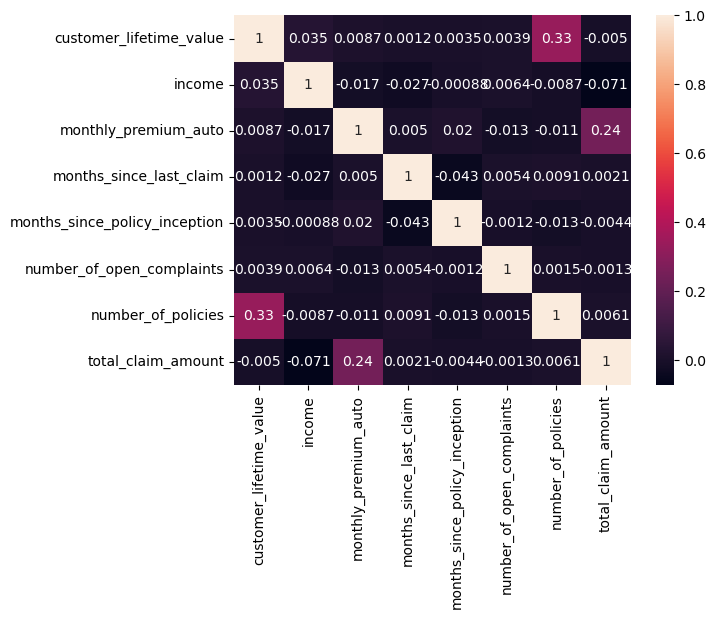

In [38]:
ax=sns.heatmap(numerical_df.corr(), annot=True)
plt.show()

# There is not any hight correlation, 
#by the way we can see that 'customer_lifetime_value' and 'number_of_policies' correlates well, also 'monthly_premium_auto' and 'total_claim_amount'.

### Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

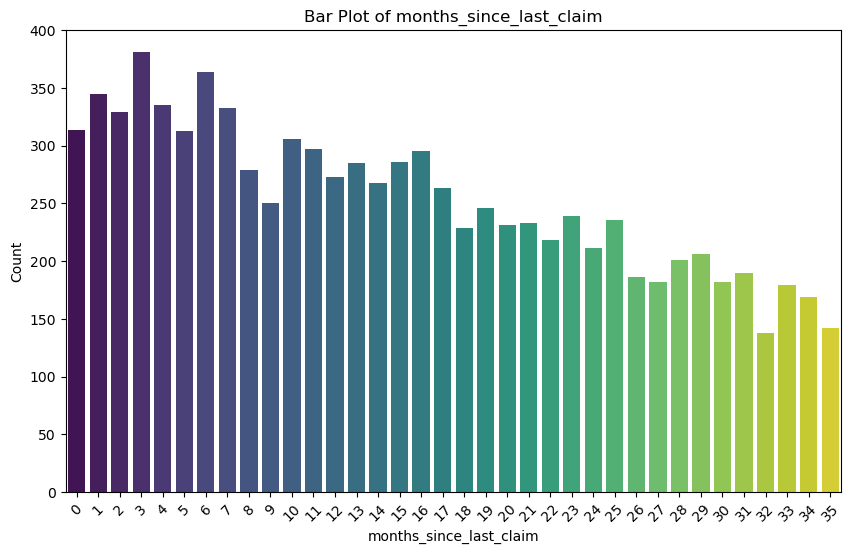

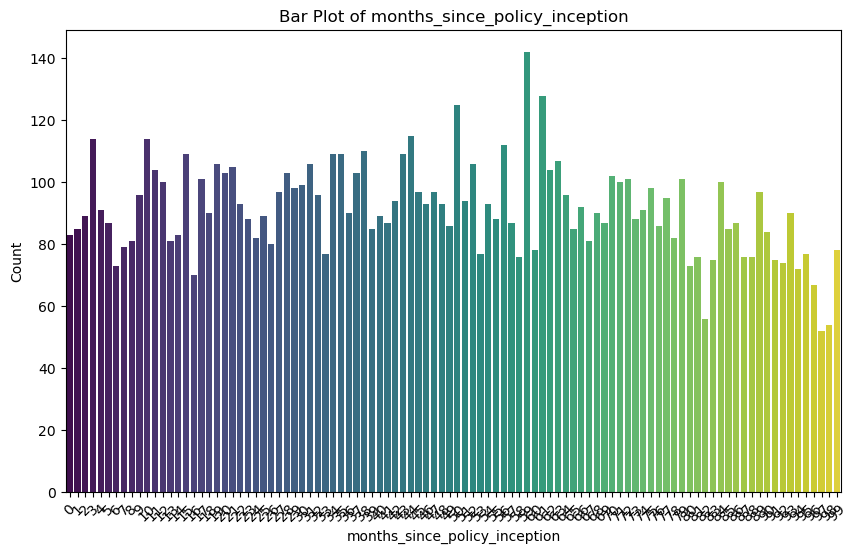

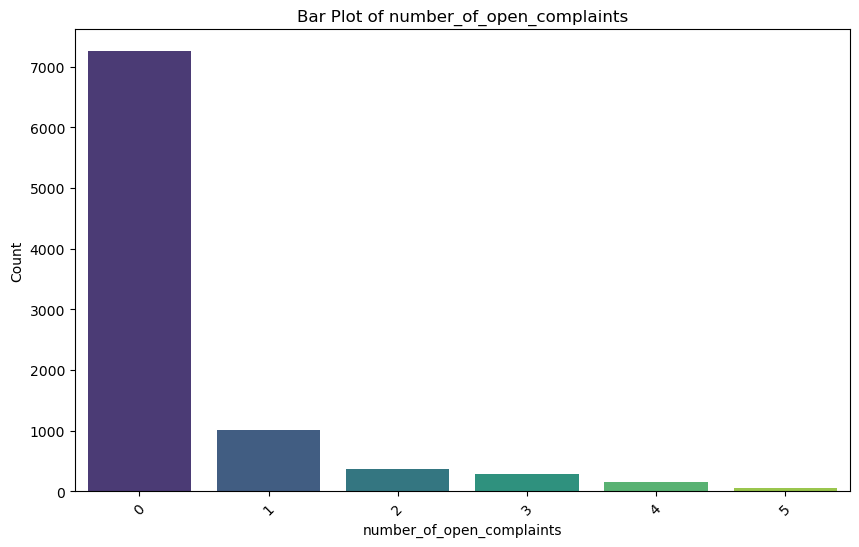

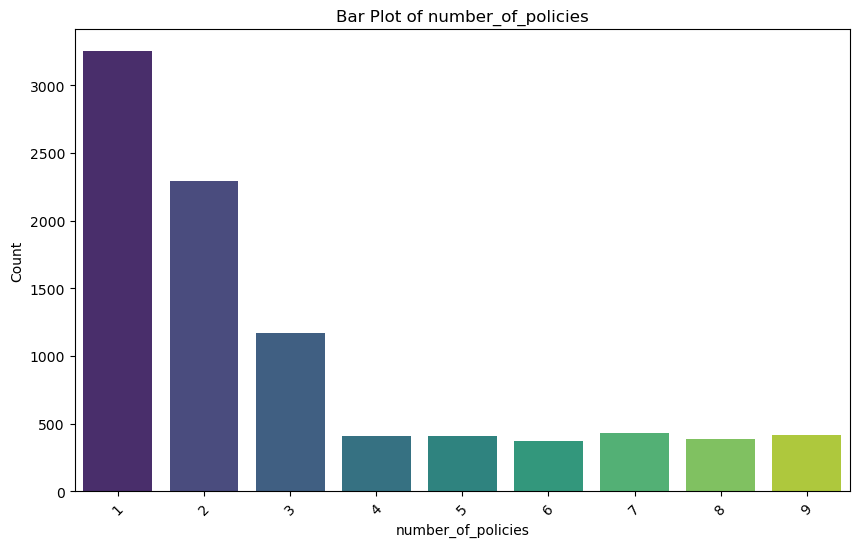

In [39]:
def plot_discrete_variables(numerical_df, discrete_vars):
    for column in discrete_vars:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=numerical_df[column], palette='viridis')
        plt.title(f'Bar Plot of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

plot_discrete_variables(numerical_df, discrete_vars)

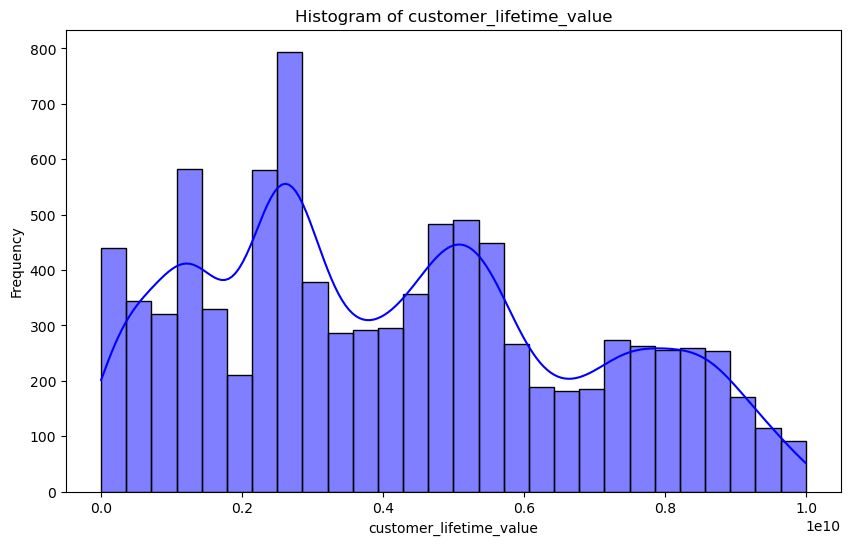

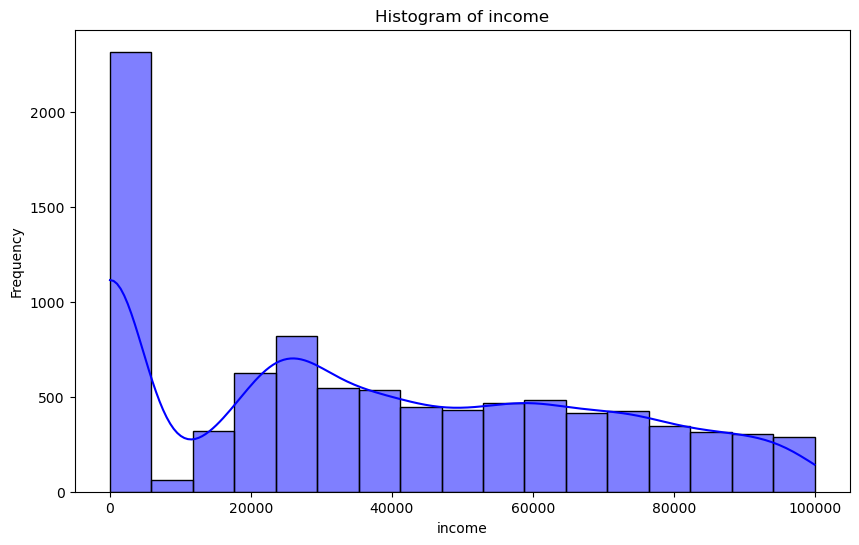

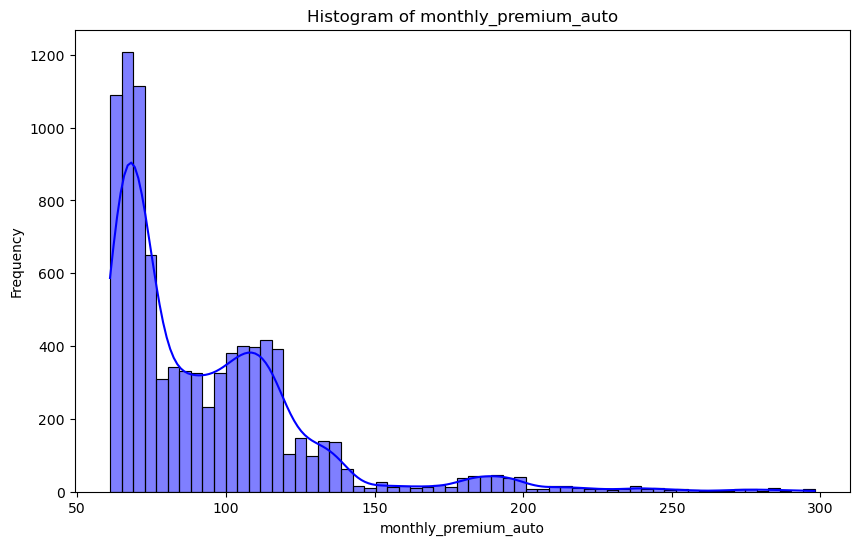

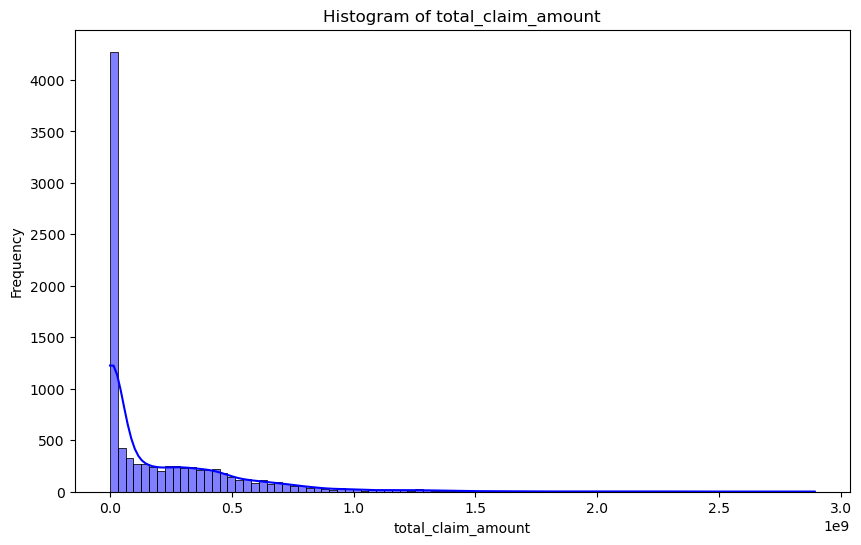

In [40]:
def plot_continuous_variables(numerical_df, continuous_vars, plot_type='histogram'):
    for column in continuous_vars:
        plt.figure(figsize=(10, 6))
        if plot_type == 'histogram':
            sns.histplot(numerical_df[column], kde=True, color='blue')
            plt.title(f'Histogram of {column}')
        elif plot_type == 'boxplot':
            sns.boxplot(x=numerical_df[column], palette='viridis')
            plt.title(f'Box Plot of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency' if plot_type == 'histogram' else '')
        plt.show()

plot_continuous_variables(numerical_df, continuous_vars, plot_type='histogram')

### Look for outliers in the continuous variables

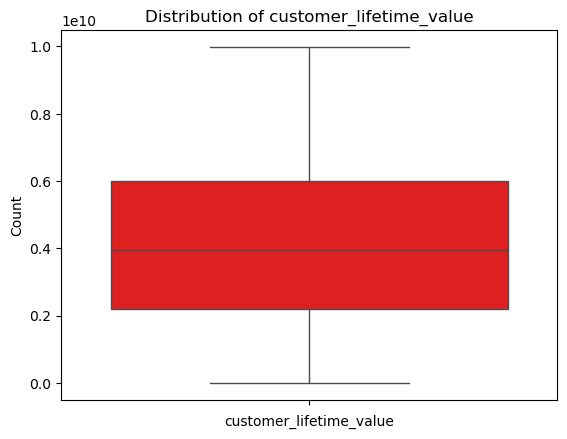

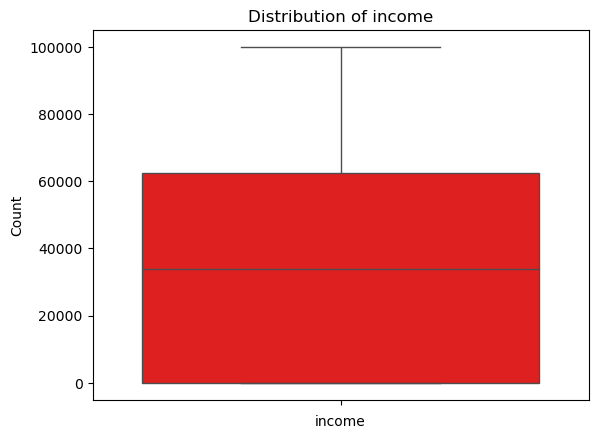

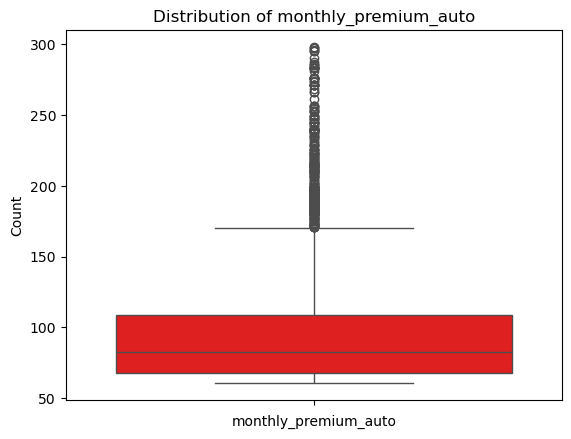

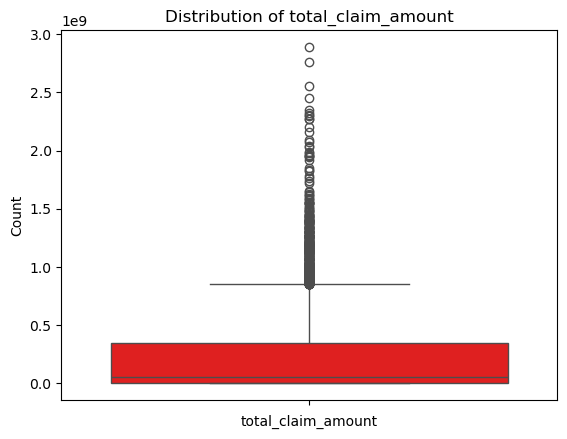

In [41]:
def plot_continuous(numerical_df):
    continuous_columns = continuous_df.columns
    
    for column in continuous_columns:
        sns.boxplot(continuous_df[column], color='red')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.show()

plot_continuous(continuous_df)

### Check all columns for NaN values. 

In [42]:
numerical_df.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

### We will start with removing outliers.

In [44]:
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2.763519e+09,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,3.848111e+08,Two-Door Car,Medsize
1,QZ44356,Arizona,6.979536e+09,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1.131465e+09,Four-Door Car,Medsize
2,AI49188,Nevada,1.288743e+09,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,5.664722e+08,Two-Door Car,Medsize
3,WW63253,California,7.645862e+09,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,5.298813e+08,SUV,Medsize
4,HB64268,Washington,2.813693e+09,No,Basic,Bachelor,2011-03-02,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,1.381309e+08,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,2.340599e+09,No,Basic,Bachelor,2011-10-02,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,1.982348e+08,Four-Door Car,Medsize
9130,PK87824,California,3.096511e+09,Yes,Extended,College,2011-12-02,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,3.792000e+02,Four-Door Car,Medsize
9131,TD14365,California,8.163890e+09,No,Extended,Bachelor,2011-06-02,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,7.907850e+08,Four-Door Car,Medsize
9132,UP19263,California,7.524442e+09,No,Extended,College,2011-03-02,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,6.912000e+02,Four-Door Car,Large


In [56]:
# Function to remove outliers
def remove_outliers(df):
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

numerical_without_outliers = remove_outliers(numerical_df)
numerical_without_outliers

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2.763519e+09,56274,69,32,5,0,1,384811147.0
2,1.288743e+09,48767,108,18,38,0,2,566472247.0
3,7.645862e+09,0,106,18,65,0,7,529881344.0
4,2.813693e+09,43836,73,12,44,0,1,138130879.0
5,8.256298e+07,62902,69,14,94,0,2,159383042.0
...,...,...,...,...,...,...,...,...
9128,4.100399e+09,47761,104,16,58,0,1,541282007.0
9129,2.340599e+09,71941,73,18,89,0,2,198234764.0
9130,3.096511e+09,21604,79,14,28,0,1,379.2
9132,7.524442e+09,21941,96,34,3,0,3,691.2


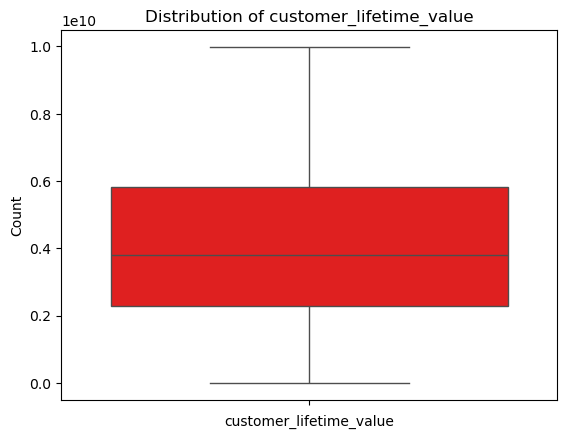

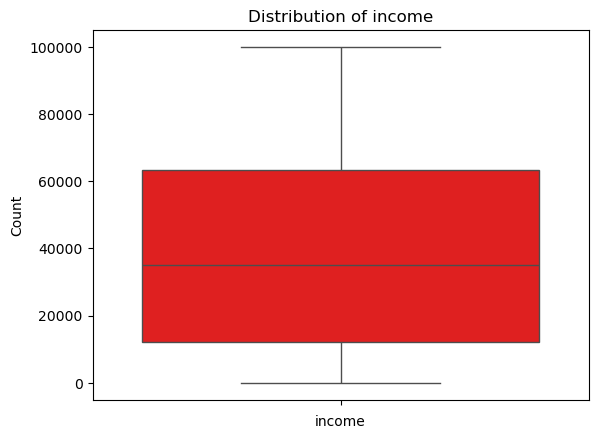

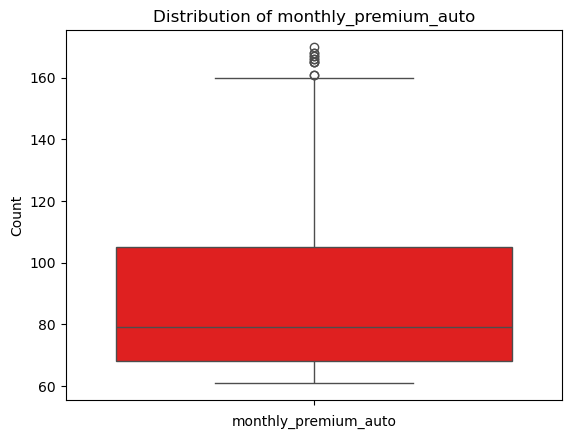

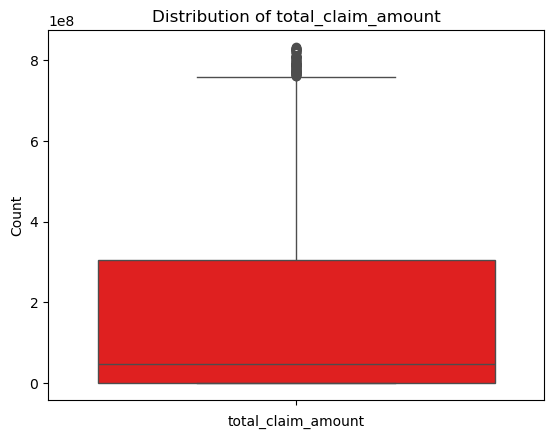

In [57]:
def plot_continuous(df):
    continuous_columns = continuous_df.columns
    
    for column in continuous_columns:
        sns.boxplot(df[column], color='red')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.show()

plot_continuous(numerical_without_outliers)

### Normalize the continuous variables.

In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(continuous_df)

scaled_df = pd.DataFrame(scaled_data, columns=continuous_df.columns)
continuous_df[continuous_df.columns] = scaled_df
print(continuous_df.head())

   customer_lifetime_value    income  monthly_premium_auto  total_claim_amount
0                 0.276662  0.562847              0.033755            0.133004
1                 0.698737  0.000000              0.139241            0.391072
2                 0.129019  0.487763              0.198312            0.195792
3                 0.765444  0.000000              0.189873            0.183145
4                 0.281685  0.438443              0.050633            0.047743


### Encode the categorical variables

In [72]:
data_cat = data.select_dtypes(include = object)
data_cat

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [73]:
encoded_df = pd.get_dummies(data_cat)
encoded_df

,customer_AA10041,customer_AA11235,customer_AA16582,customer_AA30683,customer_AA34092,customer_AA35519,customer_AA56476,customer_AA69265,customer_AA71604,customer_AA93585,...,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,True,False
9130,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
9131,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
9132,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False


### The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [71]:
# it is already done

### Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [74]:
# It is done